# Recitation 0d : Datasets and Dataloaders

# Goal
Our goal in this recitation is to get comfortable using the dataset and data loader objects 

# Contents


1.   Reading and Saving (Numpy)
2.   Reading and Saving (Pandas)
3.   Pytorch Datasets and Dataloaders
4.   Data Transforms
5.   Collate Function




# Reading and Saving (Numpy)

Documentation: [Numpy Docs](https://numpy.org/doc/stable/reference/routines.io.html)


In [1]:
import numpy as np

# npy
# saving as numpy array
# creates a numpy array of ones of given sizse
tmp_array = np.ones((3,3))
# saves the passed numpy array with the passed name the current directory
np.save("tmp_array.npy", tmp_array)
# np.load loads numpy arrays
read_array = np.load("tmp_array.npy")

# Pickle is  used to help with serialiization
# Here we have list of lists of different sizes which is converted to numpy array
tmp_array_pkl = np.array([[0,1],[2,3,4],[5,6,7,8]], dtype=object)
# The above has become a list of objects so to be able to save it we need to allow pickle
np.save("tmp_array_pkl.npy", tmp_array_pkl, allow_pickle=True)
# We'll use numpy.load() but since are file is pickled we need to set allow_pickle=True
read_array_pkl = np.load("tmp_array_pkl.npy", allow_pickle=True)

print(read_array)
print(read_array_pkl)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[list([0, 1]) list([2, 3, 4]) list([5, 6, 7, 8])]


In [2]:
# npz 
# npz file format is a zipped archive of files named after the variables they contain
# In this case the variables are the two arrays we defined above
np.savez('tmp.npz', tmp_array=tmp_array, tmp_array_pkl=tmp_array_pkl)
# Again, set allow_pickle=True because one of them is pickled
npz_data = np.load('tmp.npz', allow_pickle=True, encoding='bytes')
# We access the specific variables using their names as keys
read_array = npz_data['tmp_array']
read_array_pkl = npz_data['tmp_array_pkl']

print(read_array)
print(read_array_pkl)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[list([0, 1]) list([2, 3, 4]) list([5, 6, 7, 8])]


# Reading and Saving (Pandas)

Documentation: 
> [Save csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

> [Read csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)





In [3]:
# csv
# Useful in HW P2s, we'll be submitting csv files to kaggle
import pandas as pd
#Create a dataframe
output = pd.DataFrame()
# Set the column names as 'id' and 'label'
output['id'] = np.array(range(10))
output['label'] = np.array(range(10,20))
print(output.head())

   id  label
0   0     10
1   1     11
2   2     12
3   3     13
4   4     14


In [4]:
#saving the dataframe as a csv
output.to_csv("submission.csv", index = False)

output_read = pd.read_csv("submission.csv")
print(output_read.head())

   id  label
0   0     10
1   1     11
2   2     12
3   3     13
4   4     14


# Datasets and Dataloaders (Pytorch)



## Manual data feed

In [7]:
import torch


In [ ]:
data = np.load("some_sample_data_with_labels.npy")
x = torch.Tensor((data[:,0:-1]),requires_grad=True)
y = torch.Tensor(torch.from_numpy(data[:,[-1]]))


In [ ]:
# Load entire data manually
#Training Loop
for epoch in range(10):
  # forward pass
  y_pred = model(x)
  ...

In [ ]:
# Load data manually in batches
for epoch in range(10):
    for i in range(n_batches):
        # Local batches and labels
        local_X, local_y = x[i*n_batches:(i+1)*n_batches,], y[i*n_batches:(i+1)*n_batches,]

        # Your model
        [...]

## In Neural-network terminology

**1 epoch**: one forward and one backward pass of all the training examples

**batch_size**: the number of training examples in one forward/backward pass. The higher the batch size, the more memory spacy you will need.

**No of iterations**: number of passes, each pass using batch_size number of examples.

Example: With 100 training examples and batch size of 20 it will take 5 iterations to complete 1 epoch.

# Dataset and Dataloaders (PyTorch)

Documentation:
[Read Docs](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

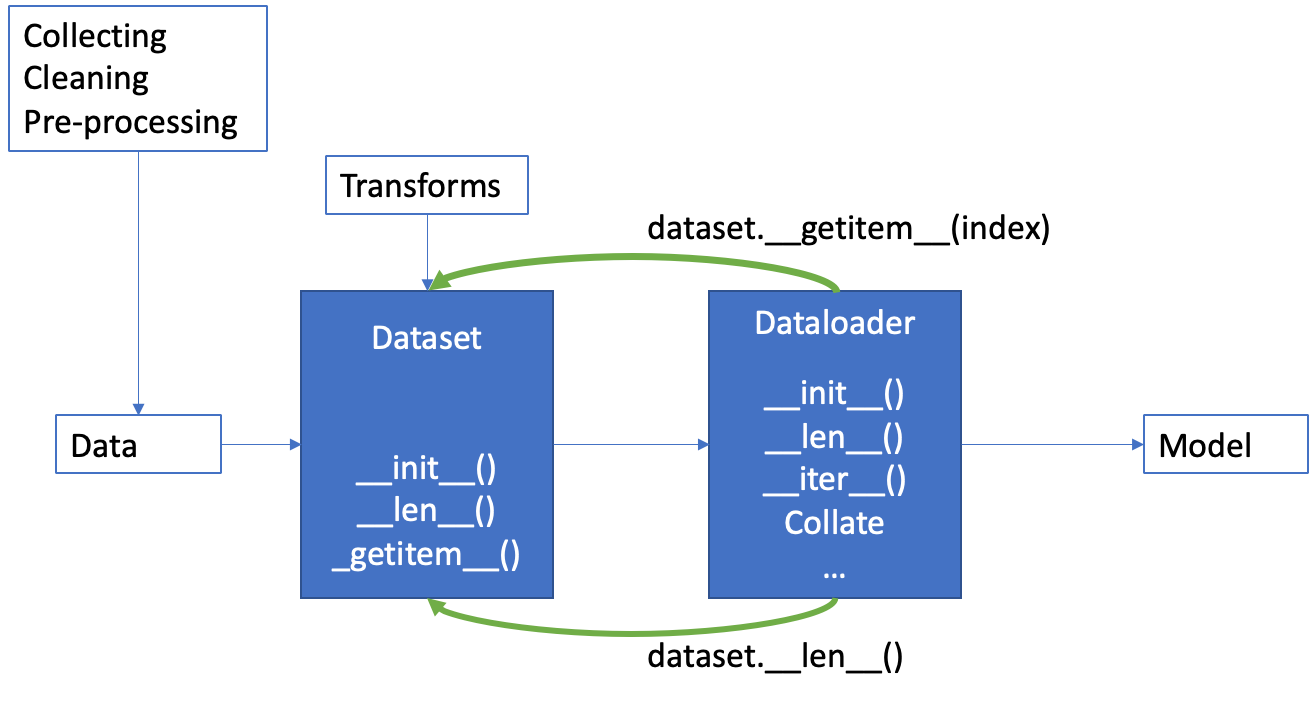

## Following dataset loaders are available in the pytorch

1. MNIST and FashionMNIST
2. COCO (Captioning and Detection)
3. ImageFolder
4. Imagenet-12
6. CIFAR10 and CIFAR100
7. AmazonReviewFull
8. MNLI
9. SQuAD 1.0
10. IEMOCAP
11. LIBRISPEECH
... (Check out the documentation)

In [7]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# FashionMNIST dataset from TorchVision
# Each image of size 28x28
# Torchvision provides the dataset and the dataset class
# We create a trainig_data object and a test_data object
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
# test_data object 
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

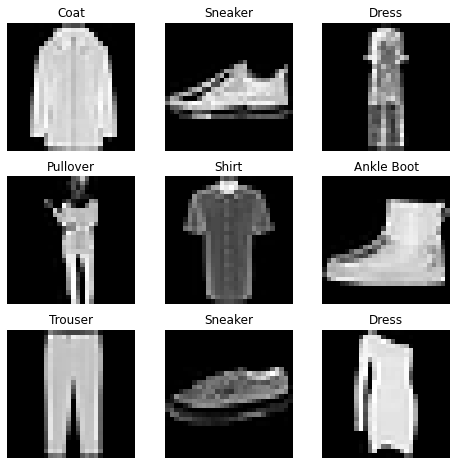

In [8]:
# Visualizing the objects
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [10]:
from torch.utils.data import DataLoader
# We got the dataset objects using the pytorch dataset class for MNIST dataset
# Now we pass that object to the Dataloader constructor
# Two separate dataloader for training and testing 
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) # shuffle True for training
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False) # shuffle False for testing

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


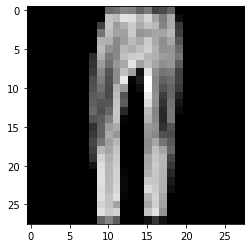

Label: 1


In [13]:
# Display image and label.
# use iter and next
# iter returns an iterable for the object and next helps iterate it
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Custom Dataset class

**\__init\__()**:
Load the data to the class so that it can be accessed later.

**\__len\__()**:
To know how many training examples are there in the dataset.

**\__getitem\__()**:
Pytroch uses this to ask for a certain example. So getitem(i) should return 'i-th' example in order chosen by you. You should use 'getitem' to do some final processing on the data before it's sent out.

**Caution**:'getitem' will be called maybe million of times so make sure you do **as little work** in here as possible for fast code. Try to keep heavy processing in 'init', which is only called ones.

In [15]:
from torch.utils.data import Dataset, DataLoader
# Dataset class will have access to the data or contain the data
# And will be used by the dataloader class to access parts of it
# Dataloader will use it to create batches, process data etc.

# torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:
# __len__ so that len(dataset) returns the size of the dataset.
# __getitem__ to support the indexing such that dataset[i] can be used to get ith sample.
class MyDataset(Dataset):
    # constructor
    # In this case it contains the data
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys
    
    #len()
    # returns the length of the dataset
    def __len__(self):
        return len(self.xs)  #len(self.ys)
    #[]
    # returns the item at index i
    def __getitem__(self, i):
        return self.xs[i], self.ys[i]

In [16]:
# We are creating a dummy dataset to understand Datasets and Dataloaders better
# It's not neccessary for your dataset to target labels, for eg. self-supervised learning
# For simplicity, int the following case we can assume xs to input and ys to be target
xs = list(range(10))
ys = list(range(10,20))
print('xs values: ', xs)
print('ys values: ', ys)

# Create an instance of MyDataset class
dataset = MyDataset(xs, ys)
print(dataset[0]) # returns the tuple (x[2], y[2])
# This is basically same as 
print(dataset.__getitem__(0))
# Which the dataloader needs

xs values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ys values:  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
(0, 10)
(0, 10)


# Custom DataLoaders

Handles data loading logic

1. Collate into batches
2. Single and multi-process loading
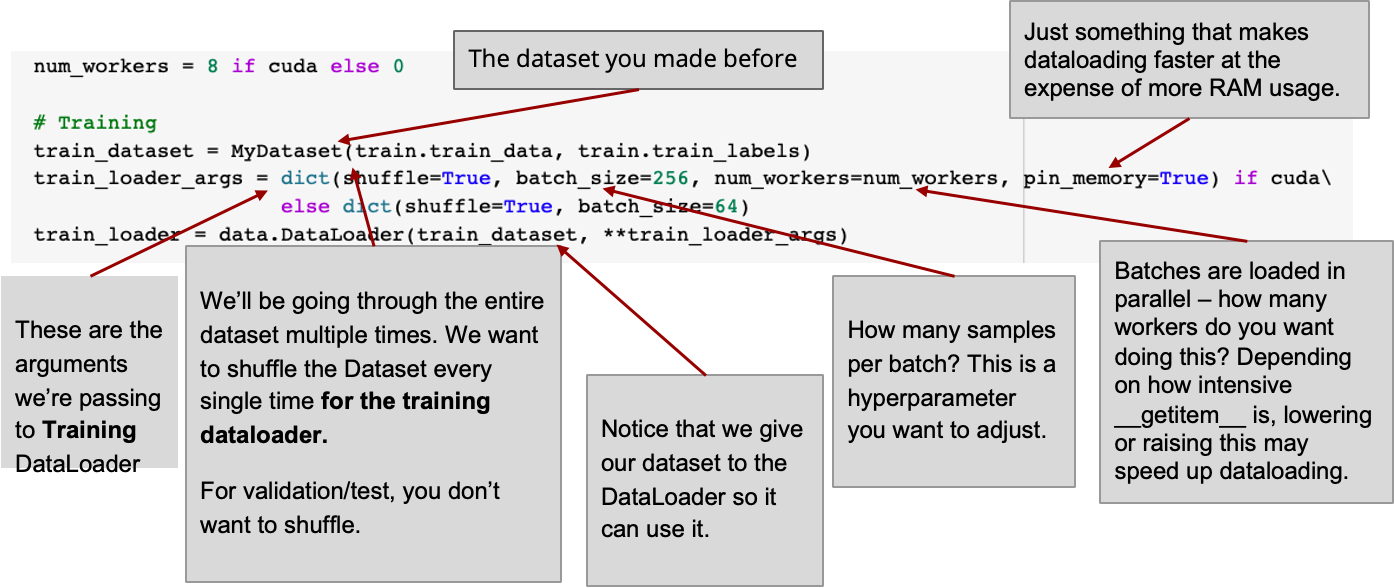

In [17]:
# Let's look at different ways of creating the Dataloader object using the Dataloader class
from torch.utils.data import DataLoader
#batch size of 1, so we the size of x and y is 1 and no shuffling
for x, y in DataLoader(dataset):
    print(x,y)

tensor([0]) tensor([10])
tensor([1]) tensor([11])
tensor([2]) tensor([12])
tensor([3]) tensor([13])
tensor([4]) tensor([14])
tensor([5]) tensor([15])
tensor([6]) tensor([16])
tensor([7]) tensor([17])
tensor([8]) tensor([18])
tensor([9]) tensor([19])


In [15]:
# batch size of 2, so x and y both have a size of 2
for x, y in DataLoader(dataset, batch_size=2, shuffle=True):
    print(x,y)

tensor([3, 5]) tensor([13, 15])
tensor([1, 4]) tensor([11, 14])
tensor([2, 6]) tensor([12, 16])
tensor([7, 8]) tensor([17, 18])
tensor([9, 0]) tensor([19, 10])


# Custom Image Dataset

In [18]:
#Save MNIST images in zip and labels in annotations file
# Create a dataset for demonstration
train_images_custom = []
train_labels_custom = []
# Create a list of numpy arrays
for i in range(10):
    train_images_custom.append(training_data[i][0].numpy())
    train_labels_custom.append(training_data[i][1])
# Convert the list to a numpy array
images_npy = np.array(train_images_custom)
np.save("images_npy.npy", images_npy)

labels_npy = np.array(train_labels_custom)
np.save("labels_npy.npy", labels_npy)

In [19]:
# Create the custom dataset class, as explained before, the dataset class should
# have a constructor(__init__), length(__len__(self)) &  get item(__getitem__(self,index))
# Do as much processing as you can in the init function since the getitem is called many times 
# Collate helps in working with batches, we'll go deeper into this in the future homeworks
class CustomImageDataset(Dataset):
    def __init__(self, images_npy, labels_npy):
        self.imgs = np.load(images_npy)
        self.img_labels = np.load(labels_npy)
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.img_labels[idx]
        return image, label

    def collate_fn(self,batch):
      # get the training and test from the batch
      xs, ys = zip(*batch)
      # Process it
      #For demo - padding border
      xs = [np.pad(x_i, ((0,0),(20, 20), (20, 20)), constant_values=0) for x_i in list(xs) ] 
      return tuple(xs), ys


# Collate function

A dataloader parameter which can be customized to achieve custom batching i.e. :
1. To stack the the data other than the first dimension  
2. To stack data of different lengths (Used in HW3/4)
3. To put together data of different data types

You may also apply some transformation in the collate function;
One can choose to apply transformation in the collate function instaed of dataset class if transformation needs to be applied on batches.
Also, since data loader support multiprocess through multi-workers, hence collate_fn() also can take advantage of multi-workers performance speed up.

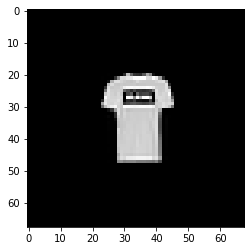

Label: 0


In [18]:
# Create an object of the custom dataset class
train_data_custom = CustomImageDataset("images_npy.npy", "labels_npy.npy")
# create a dict of arguments, another way of passing arguments
# Used the custom collate_fn
train_args = dict(batch_size=2, shuffle=True, collate_fn= train_data_custom.collate_fn)
# pass the arguments
train_dataloader_custom = DataLoader(train_data_custom, **train_args)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader_custom))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Data Transforms

Transforms can be applied to PIL images, tensors, ndarrays, or custom data during creation of the dataset.



In [ ]:
import torchvision
import torchvision.transforms as transforms


train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    ...
    transforms.ToTensor()
    
])

# Compose multiple transforms
test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, images_npy, labels_npy, transform = None):
        self.imgs = np.load(images_npy)
        self.img_labels = np.load(labels_npy)
        self.transform = transform
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.img_labels[idx]
        if self.transform:
            image = self.transforms(image)
        return image, label

    def collate_fn(self,batch):
      # get the training and test from the batch
      xs, ys = zip(*batch)
      # Process it
      #For demo - padding border
      xs = [np.pad(x_i, ((0,0),(20, 20), (20, 20)), constant_values=0) for x_i in list(xs) ] 
      return tuple(xs), ys

In [ ]:
# Create an object of the custom dataset class
train_data_custom = CustomImageDataset("images_npy.npy", "labels_npy.npy", transforms = train_transforms)
...